# Predict data with Keras Model Loaded

In [1]:
%run ./prepare_dataset.ipynb

System version
 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


Using TensorFlow backend.



Your Device List:
 [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16237882356994387967
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6700198133
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2748342313875113127
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


### Prepare prediction experiment

In [2]:
def prepare_experiment(variable, model_name):
    img_width, img_height, img_size, batch_size =  prepareConstants(variable ,variable,variable,16)
    train_data_dir, validation_data_dir = setDirs()
    train_generator, validation_generator = prepareDatasets(train_data_dir,validation_data_dir,img_width,img_height,batch_size)
    checkData(train_generator,validation_generator)
    
    model = loadStandardModel("..\models",model_name)
    
    errors = seeErrors(validation_data_dir,validation_generator,model,True)

# Test the experiment 1 v1 model


Image Width: 224
Image Height: 224
Image Size: 224
Batch Size: 16

Train dir: ../fruits-360/Training/
Test dir: ../fruits-360/Test/

Import Trainingset
Found 53177 images belonging to 103 classes.

Import Validationset
Found 17845 images belonging to 103 classes.

Train Samples:  53177
Train Classes: 103
Class Indexes:
 {'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Cactus fruit': 19, 'Cantaloupe 1': 20, 'Cantaloupe 2': 21, 'Carambula': 22, 'Cherry 1': 23, 'Cherry 2': 24, 'Cherry Rainier': 25, 'Cherry Wax Black': 26, 'Cherry Wax Red': 27, 'Cherry Wax Yellow': 28, 'Chestnut': 29, 'Clementine': 30, 'Cocos': 31, 'Dates': 32, 'Granadilla': 33,

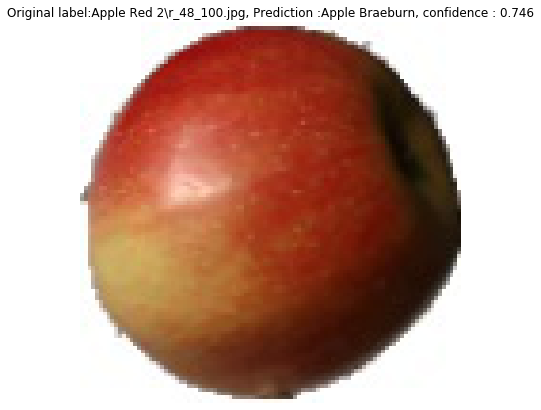

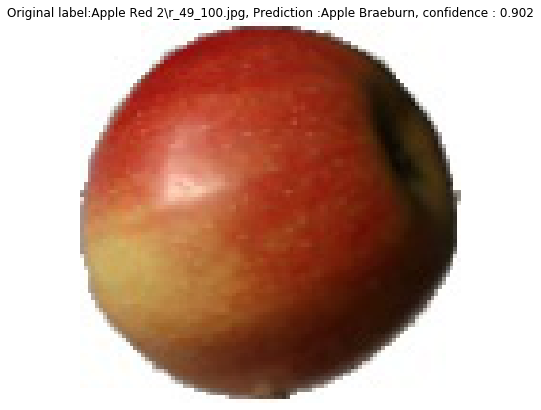

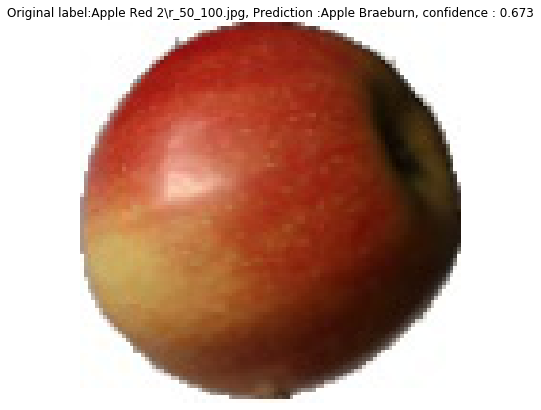

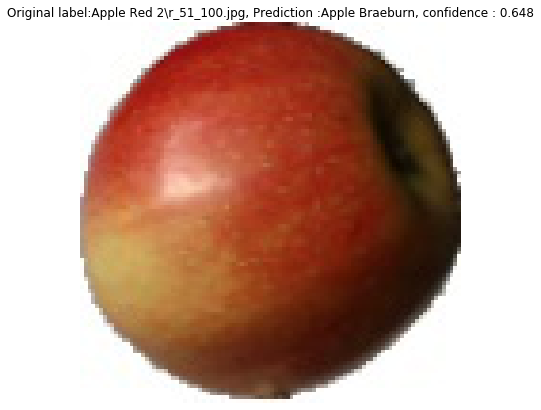

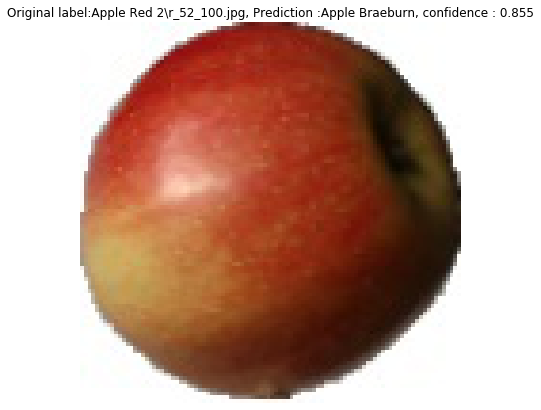

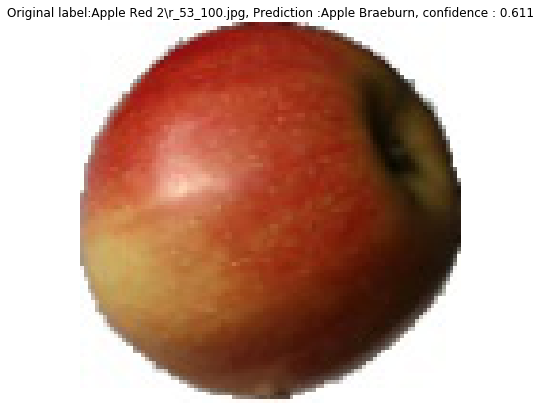

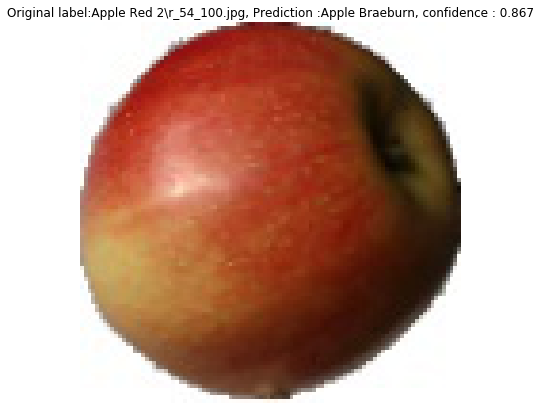

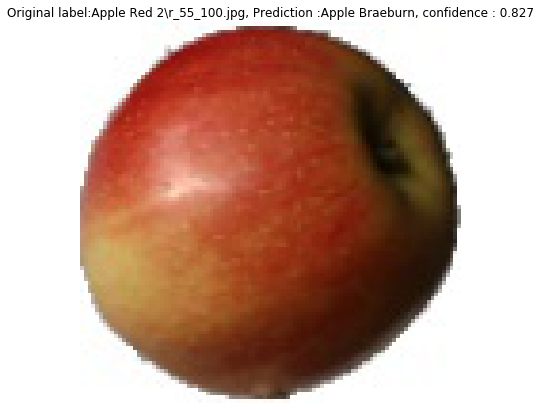

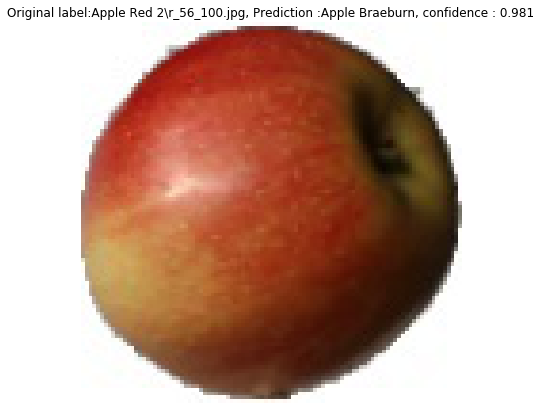

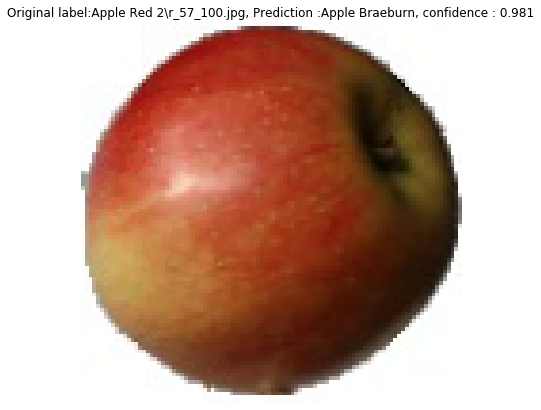

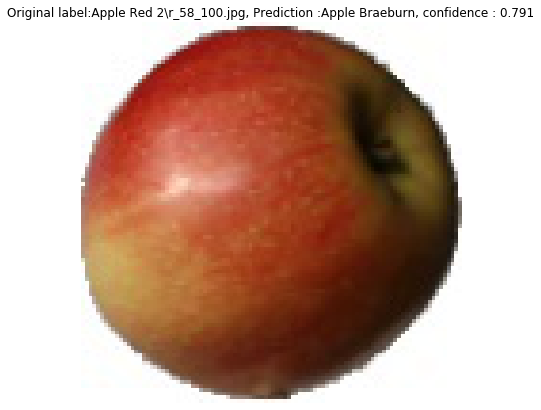

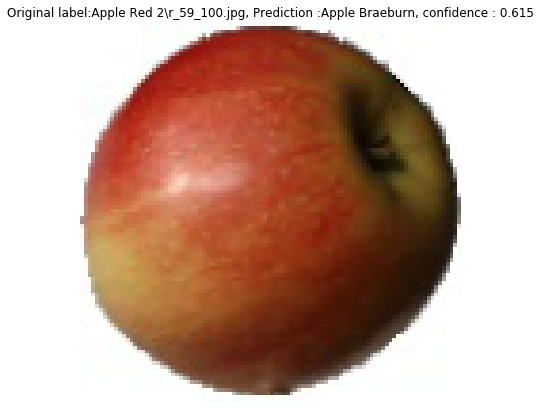

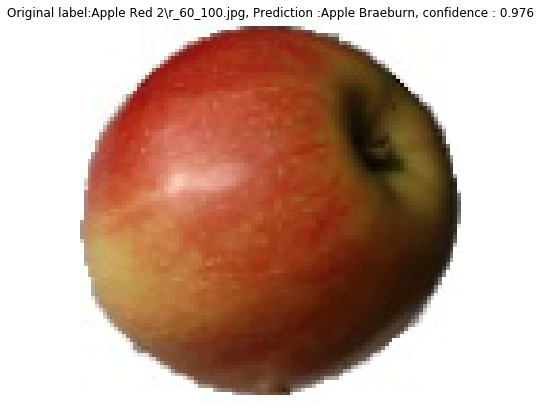

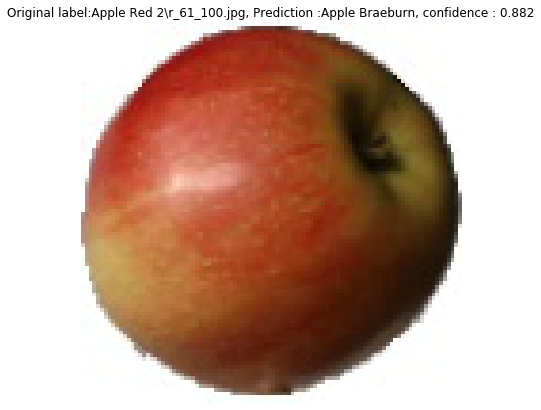

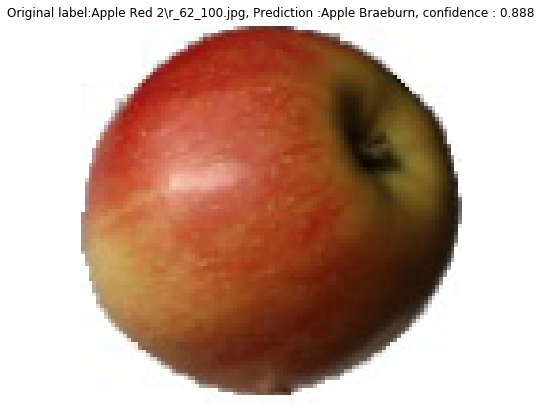

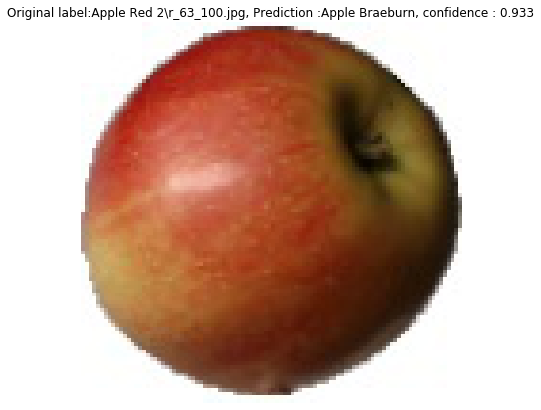

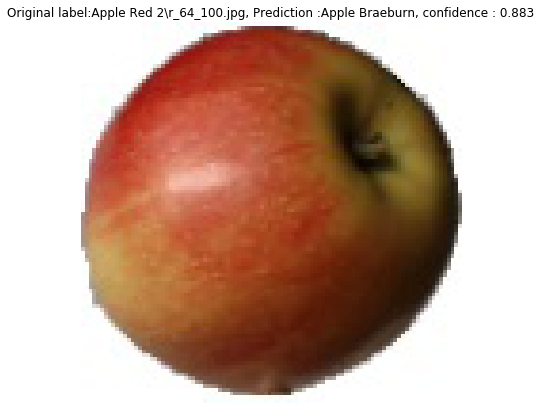

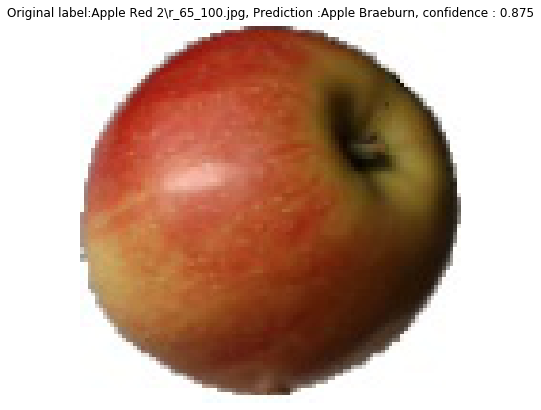

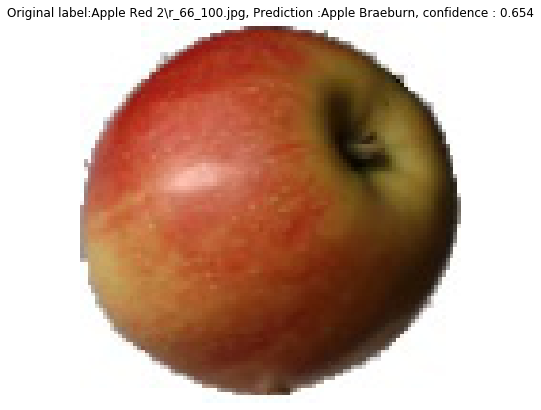

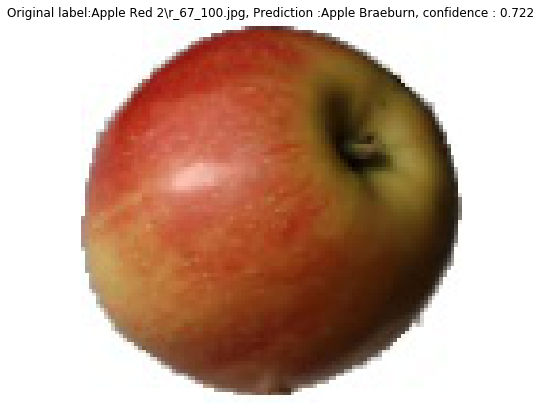

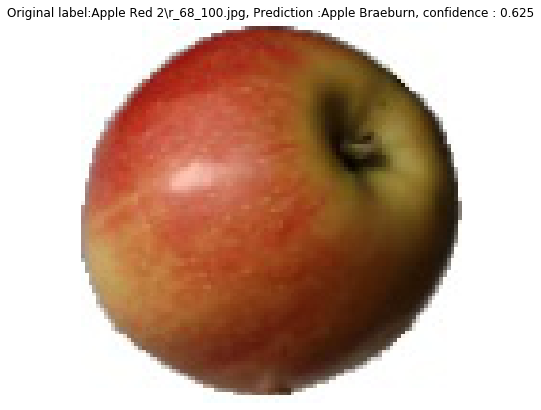

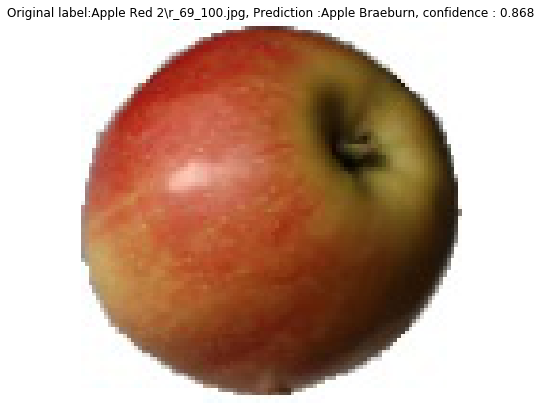

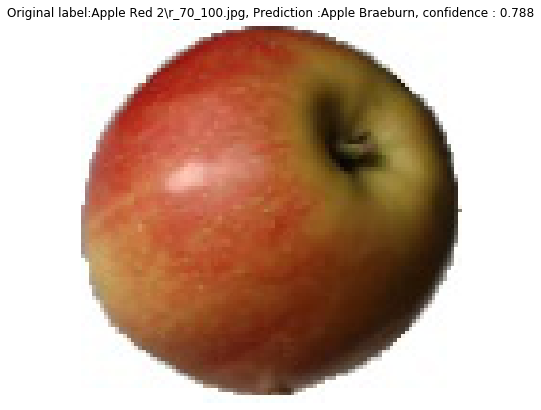

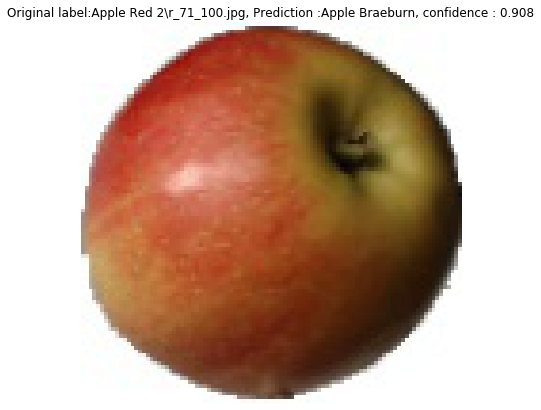

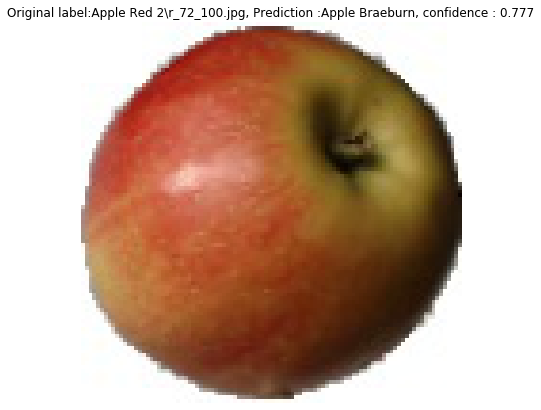

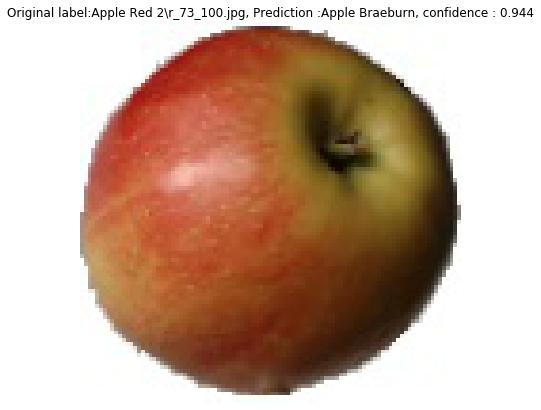

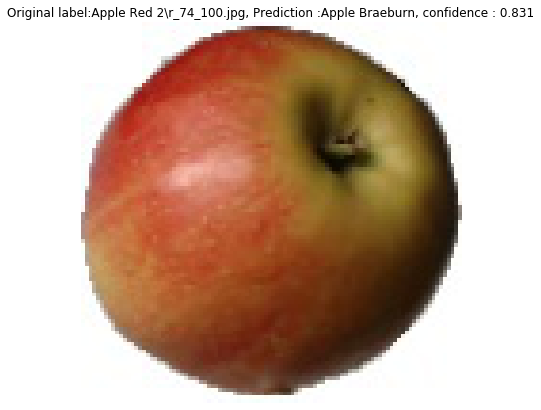

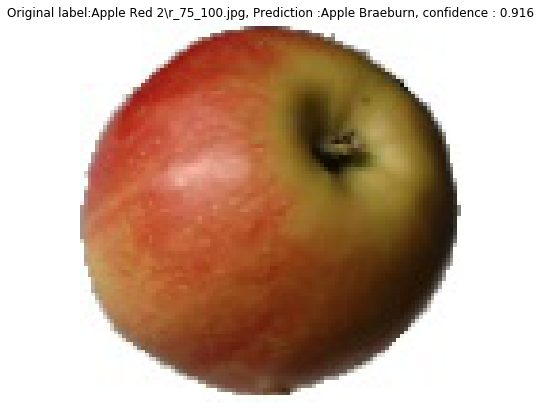

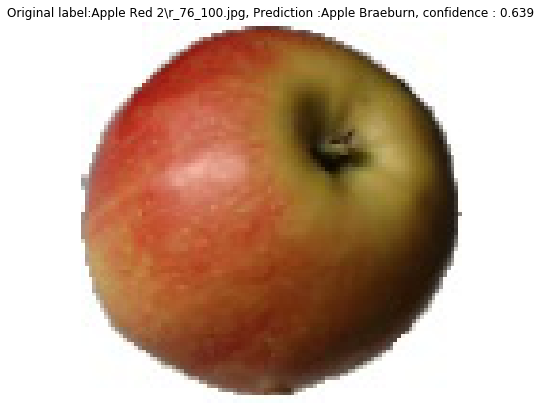

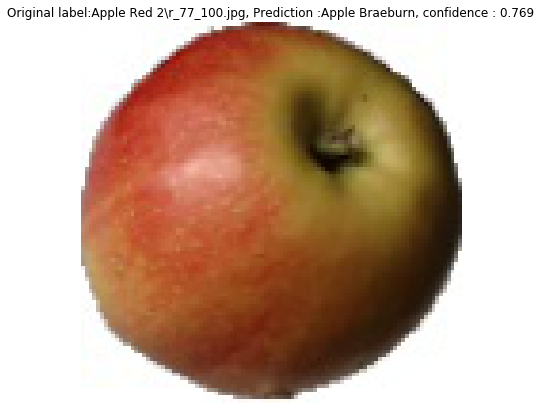

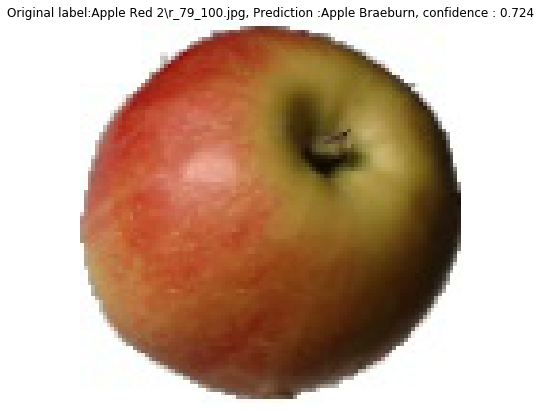

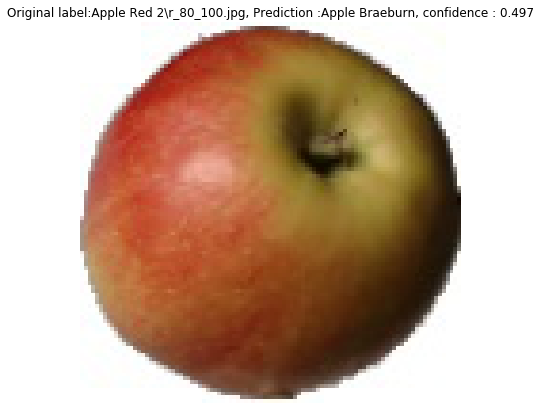

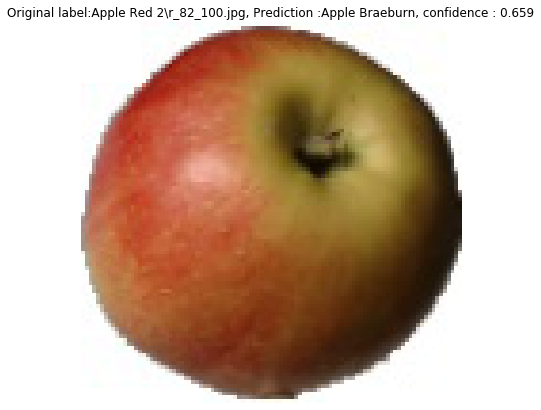

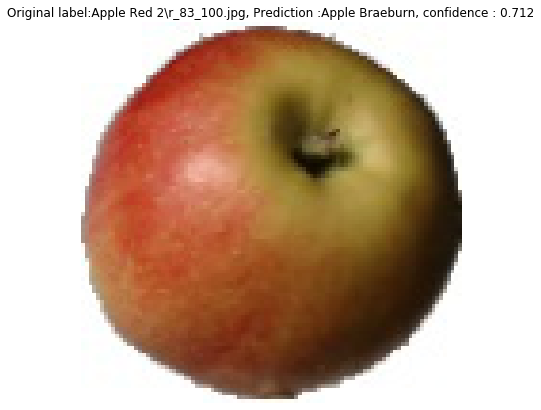

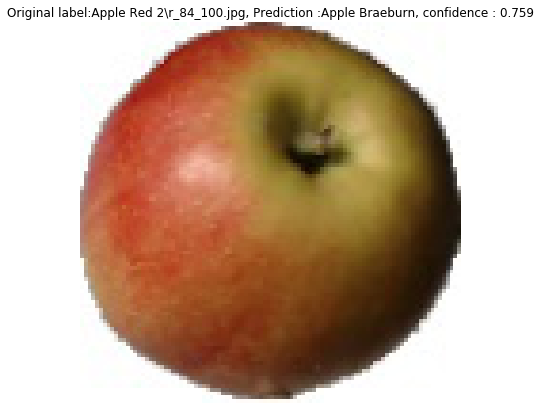

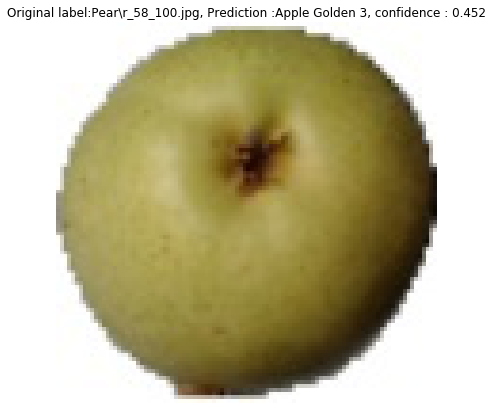

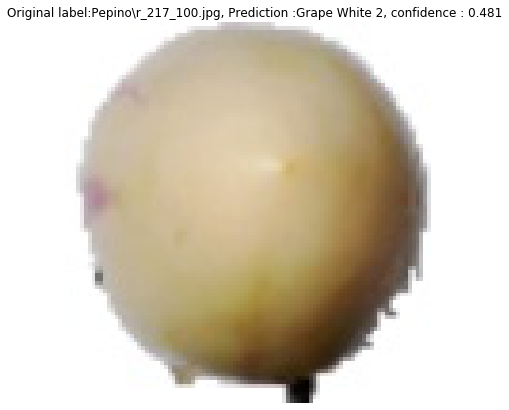

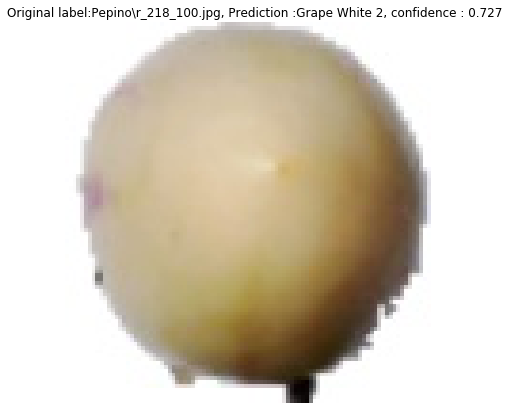

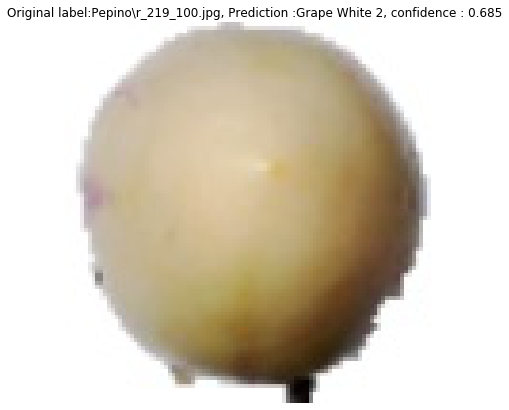

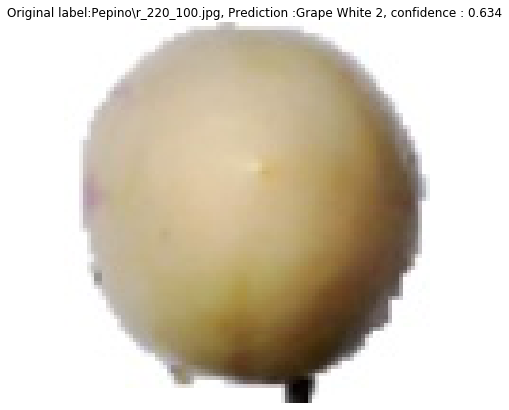

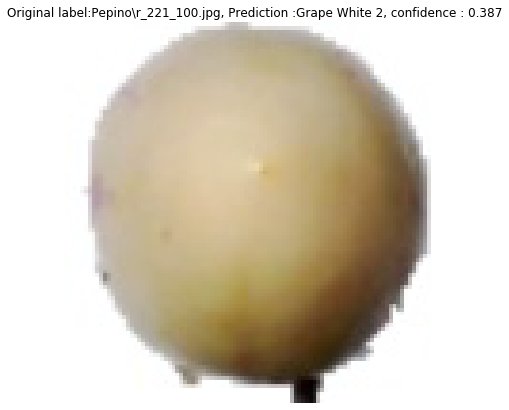

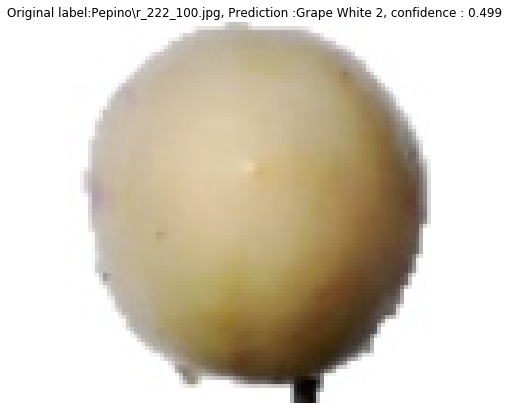

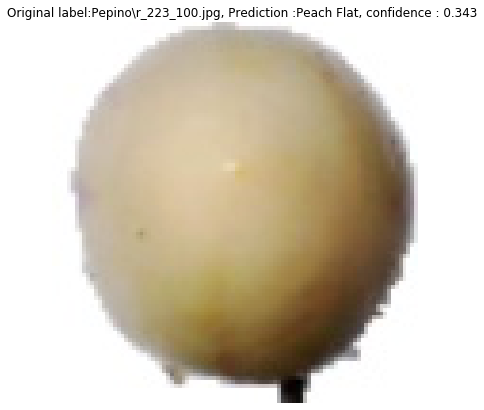

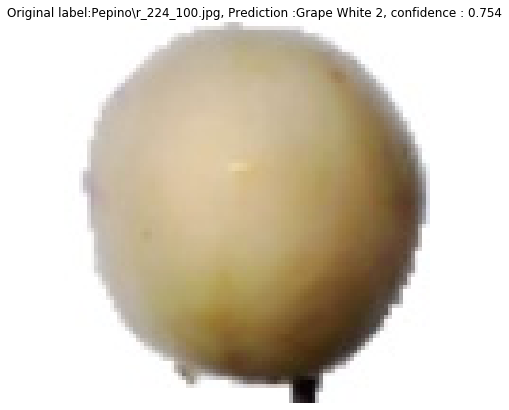

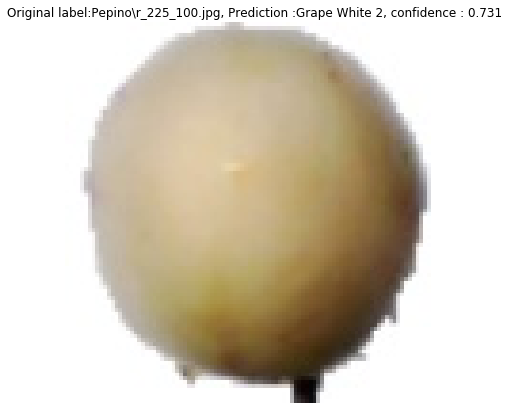

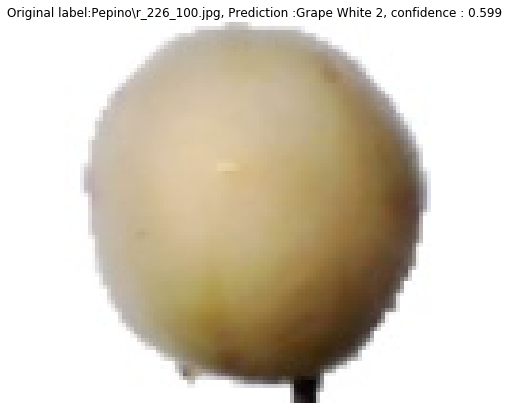

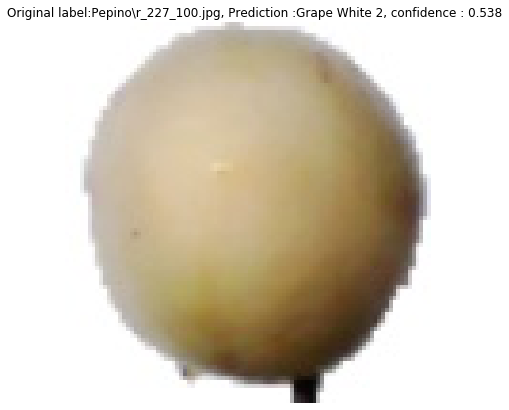

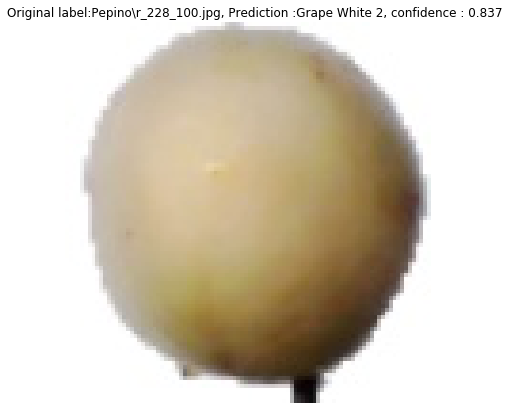

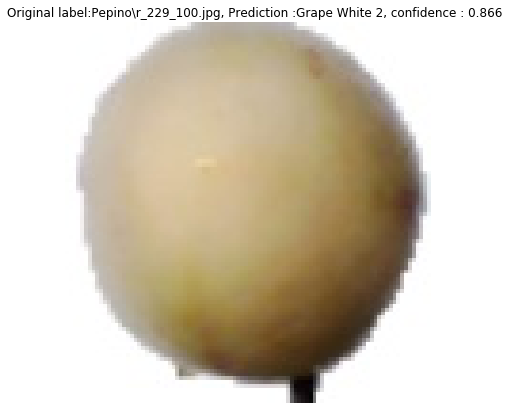

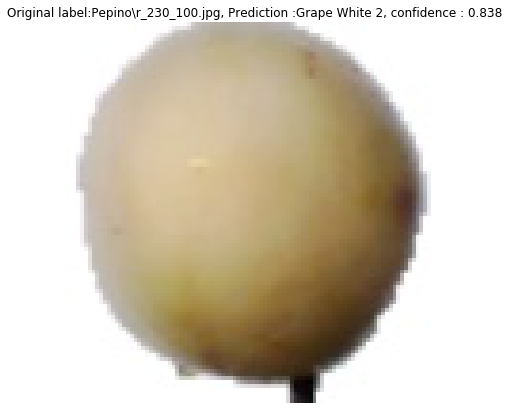

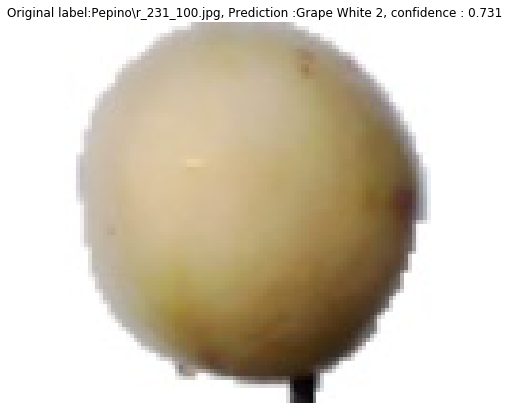

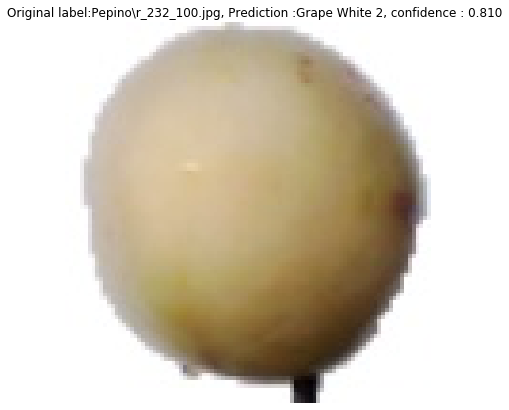

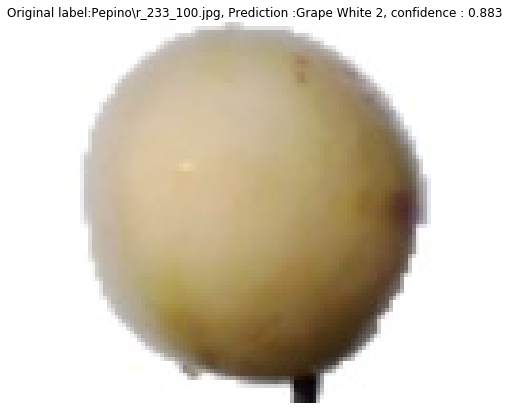

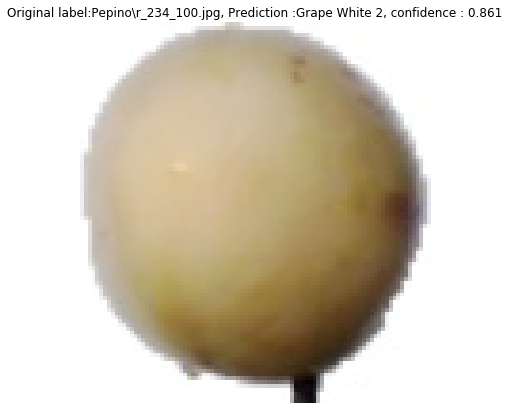

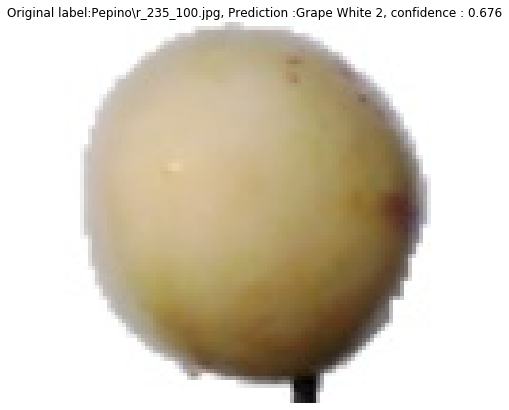

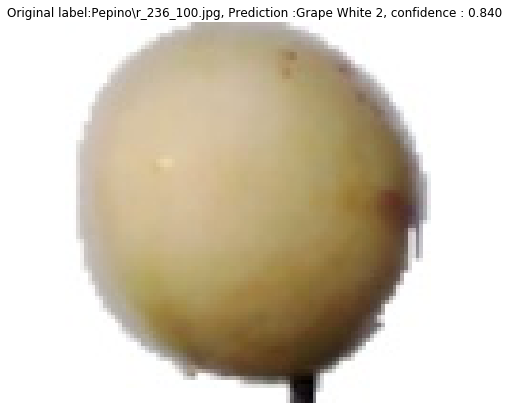

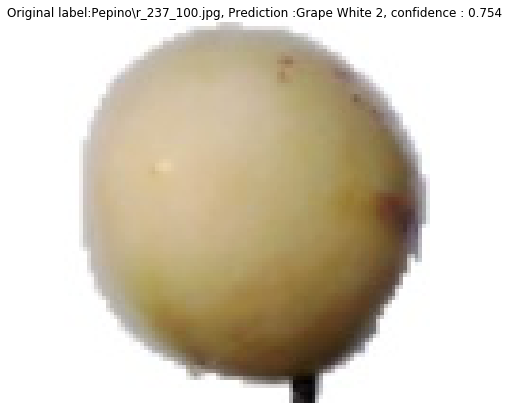

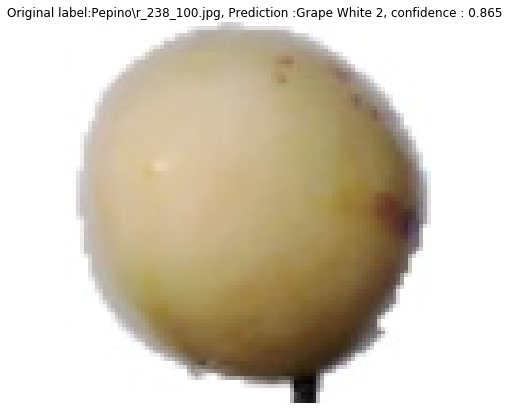

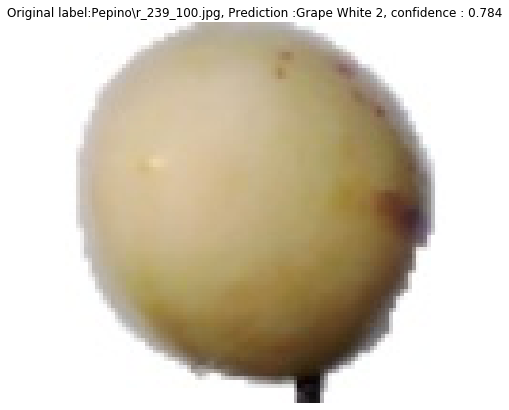

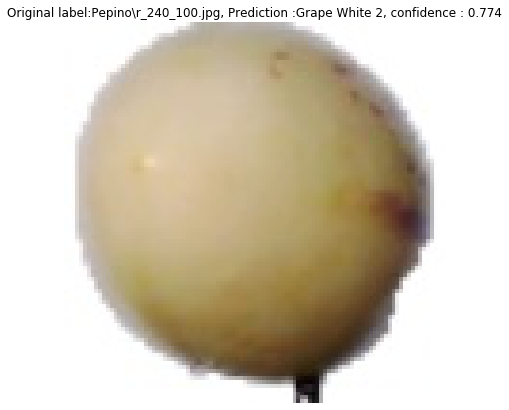

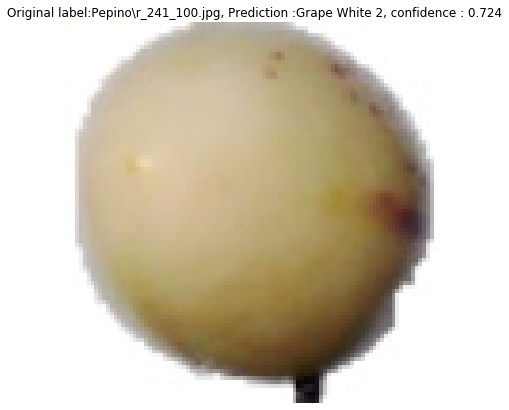

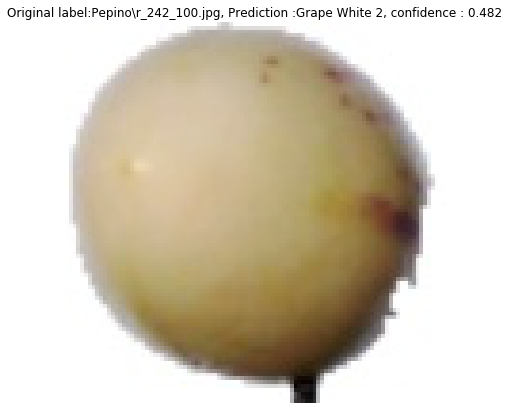

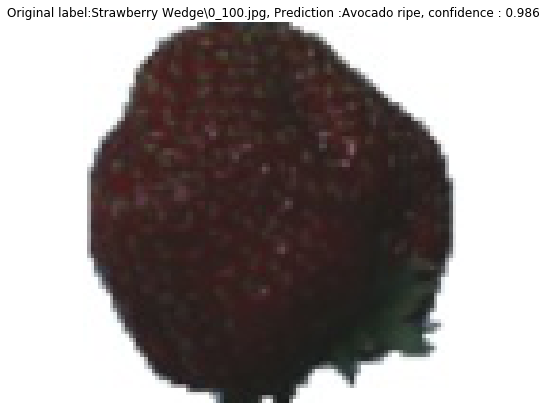

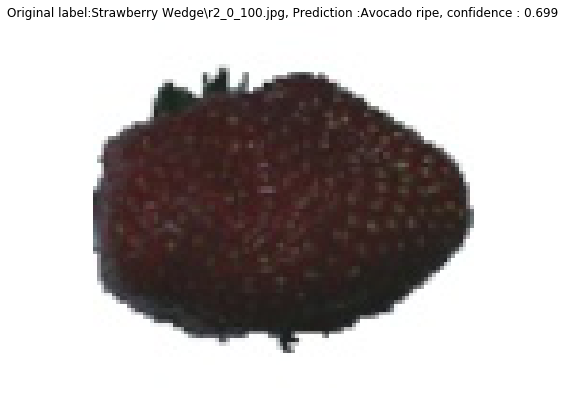

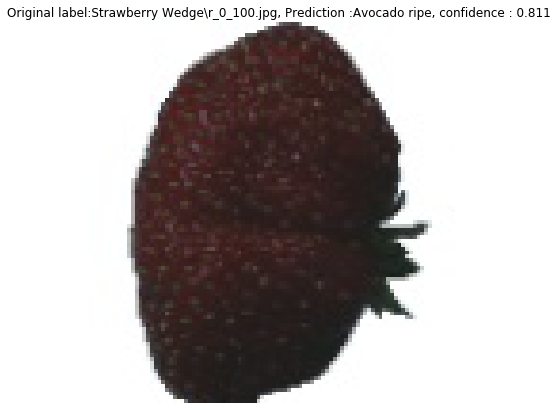

In [3]:
model_name = "resNet50custom"
variable = 224
prepare_experiment(variable,model_name)

In [ ]:
#Calc the accuracy score
predictions_classes = np.argmax(predictions,axis=1)
ground_truth = np.argmax(validation_generator,axis=1)
accuracy = accuracy_score(predictions_classes, ground_truth)

print(accuracy)

# Test the experiment 3 model

In [ ]:
model_name = "customPaper"
variable = 100
prepare_experiment(model_name,variable)

### Check the errors

In [6]:
#Calc the accuracy score
predictions_classes = np.argmax(predictions,axis=1)
ground_truth = np.argmax(validation_generator,axis=1)
accuracy = accuracy_score(predictions_classes, ground_truth)

print(accuracy)

MemoryError: 

### Manual Re-create validation set

In [47]:
validation_data_dir = '../fruits-360/Test/'
img_width = 224
img_height = 224
img_size = 224
batch_size = 16

In [48]:
test_datagen = ImageDataGenerator(rescale=1. / 255) 

In [51]:
print("\nImport Validationset")
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle = False,
    class_mode='categorical')


Import Validationset
Found 17845 images belonging to 103 classes.


### Test and make predictions

In [52]:
import sklearn.datasets
import sklearn.model_selection
import keras
from sklearn.metrics import accuracy_score

In [53]:
filenames = validation_generator.filenames
nb_samples = len(filenames)
desired_batch_size = 16

with tf.device("/device:GPU:0"):
    prediction = model.predict_generator(validation_generator, steps = np.ceil(nb_samples/desired_batch_size))

print("Prediction Completed")

In [54]:
#Check predictions
predicted_classes = np.argmax(prediction,axis=1)
print(predicted_classes)

[  0   0   0 ... 102 102 102]


In [55]:
#Check Ground truth
label2index = validation_generator.class_indices
ground_truth = validation_generator.classes
print(ground_truth)

[  0   0   0 ... 102 102 102]


In [57]:
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

No of errors = 42/17845


### Other tests

In [14]:
#Calc the accuracy score
accuracy_score(np.argmax(prediction,axis=1), np.argmax(validation_generator,axis=1))

MemoryError: 

In [4]:
errors = seeErrors(validation_data_dir,validation_generator,model)

NameError: name 'best_model' is not defined

In [11]:
import sklearn.datasets
import sklearn.model_selection
import keras
from sklearn.metrics import accuracy_score

In [12]:
test_dir = validation_data_dir

testData= sklearn.datasets.load_files(test_dir,load_content=False)

y_test = np.array(testData['target'])
y_test_names = np.array(testData['target_names'])

nclasses = len(np.unique(y_test))
target_size=224

print(nclasses)

x_test=[]
for filename in testData['filenames']:
    x_test.append(
            keras.preprocessing.image.img_to_array(
                    keras.preprocessing.image.load_img(filename,target_size=(target_size, target_size))
                    )
            )

x_test=np.array(x_test)
x_test=x_test/255
y_test=keras.utils.np_utils.to_categorical(y_test,nclasses)

103


MemoryError: 

In [11]:
test_dir = validation_data_dir
test_image = keras.preprocessing.image.img_to_array(keras.preprocessing.image.load_img(test_dir+"Apple Braeburn/37_100.jpg",target_size=(target_size, target_size)))
test_image = test_image/255

plt.imshow(test_image)

NameError: name 'target_size' is not defined

In [ ]:
with tf.device("/device:GPU:0"):
    y_test_pred = model.predict(x_test)
    accuracy_score(np.argmax(y_test_pred,axis=1), np.argmax(y_test,axis=1))